# BANK CLASSIFICATION PROJECT

## DAFT REMOTE JAN2021: Group Project
12-02-21 Francesca, Kym & Nick

#### Import data/ tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import math
import warnings
from scipy import stats
from itertools import combinations
from scipy.stats import chi2_contingency
from sklearn import linear_model
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, confusion_matrix, plot_confusion_matrix, mean_squared_error, r2_score, matthews_corrcoef, confusion_matrix, accuracy_score, classification_report, fbeta_score, make_scorer
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from imblearn.over_sampling import  RandomOverSampler, SMOTE
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification


pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

import pymysql
from sqlalchemy import create_engine
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
#Fran doc

#connection_string = 'mysql+pymysql://root:' + password + '@localhost/credit_card_classification'
#engine = create_engine(connection_string)

In [3]:
#Fran doc
#query = '''select * from credit_card_classification.credit_card_data;'''

#data = pd.read_sql_query(query, engine)
#data.head()'''

In [4]:
#Kym doc
connection_string = 'mysql+pymysql://root:' + password + '@localhost/credit_card_classification'
engine = create_engine(connection_string)

### PROJECT CONCLUSION: RESULTS

In [5]:
results = pd.read_csv('c:/Users/kyear/Documents/Personal/Education/Ironhack/21_25_BankProject/MODEL_RESULTS.IH_Class_project-ModelEvaluation.csv')
results.head()

,TEST_id,Transformation outliers,Ordinalise/bin,drop,FEATURE ENGINEERING. DESCRIPTION,NORMALIZER SCALER,STANDARD SCALER,MIXMAX SCALER,POWER SCALER,Class Regr MODEL,KNN MODEL,KNN\nKey,Random Forest MODEL,Ada MODEL,SVM MODEL,TOMEK BALANCER,SMOTE BALANCER,UNDER BALANCER\n-,OVER SCALER\n+,Accuracy RESULTS,Kappa RESULTS\n(0.65 target),TN RESULTS,FN RESULTS,TP RESULTS,FP RESULTS,Model Value \n10 to 1,Model \n25 to 1,Model \n100 to 1,Model \n1000 to1
0,K Test 17,1.0,1.0,0.0,"IQR outliers and bucket housesiz, avg balan 500",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.87,0.18,4488.0,214.0,114,494,0.100188,0.422222,2.032392,3.105838
1,K Test 39,1.0,1.0,1.0,"IQR outliers, Bin: HSiz, Avg balan FREQ, Avg b...",0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.91,0.18,4691.0,242.0,72,134,0.100019,0.310177,1.360965,2.061491
2,K Test 38,1.0,1.0,1.0,"IQR outliers, Bin: HSiz, Avg balan FREQ, Avg b...",0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.91,0.18,4670.0,240.0,74,255,0.078450,0.290323,1.349685,2.055927
3,K Test 37,1.0,1.0,1.0,"IQR outliers, Bin: HSiz, Avg balan FREQ, Avg b...",0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.91,0.18,4678.0,241.0,73,247,0.078259,0.287269,1.332315,2.029013
4,K Test 40,1.0,1.0,1.0,"IQR outliers, Bin: HSiz, Avg balan FREQ, Avg b...",0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.91,0.18,4695.0,244.0,70,230,0.076350,0.276770,1.278870,1.946936


https://docs.google.com/spreadsheets/d/1Zo2-p_Py4uhHTvlJ3yx0rFrLZzy2euhrbDGPHZ7EDw0/edit#gid=0

## PROJECT PROCESS

### Explore

In [6]:
query = 'select * From credit_card_classification.credit_card_data;'

data = pd.read_sql_query(query,engine)
data.head(10)

,customer_number,offer_accepted,reward,mailer_type,income_level,n_bank_accounts_open,overdraft_protection,credit_rating,n_credit_cards_held,n_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0
5,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0
8,9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.00,894.0,891.0,882.0
9,10,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,974.25,1814.0,1454.0,514.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       17976 non-null  int64  
 1   offer_accepted        17976 non-null  object 
 2   reward                17976 non-null  object 
 3   mailer_type           17976 non-null  object 
 4   income_level          17976 non-null  object 
 5   n_bank_accounts_open  17976 non-null  int64  
 6   overdraft_protection  17976 non-null  object 
 7   credit_rating         17976 non-null  object 
 8   n_credit_cards_held   17976 non-null  int64  
 9   n_homes_owned         17976 non-null  int64  
 10  household_size        17976 non-null  int64  
 11  own_your_home         17976 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

In [8]:
data.shape

(17976, 16)

In [9]:
data.describe()

,customer_number,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance
count,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,8999.727192,1.255730,1.903427,1.203549,3.499110,940.515562,910.450656,999.392190,1042.033600
std,5196.958865,0.472405,0.797086,0.427446,1.114476,350.297837,620.077060,457.402268,553.452599
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000
25%,4498.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000
75%,13501.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000


In [10]:
print("---------- Data NA:")
print(data.isna().sum())
print("---------- Data null:")
print(data.isnull().sum())

---------- Data NA:
customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income_level            0
n_bank_accounts_open    0
overdraft_protection    0
credit_rating           0
n_credit_cards_held     0
n_homes_owned           0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
dtype: int64
---------- Data null:
customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income_level            0
n_bank_accounts_open    0
overdraft_protection    0
credit_rating           0
n_credit_cards_held     0
n_homes_owned           0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
dtype: int64


In [11]:
#Sort
data = data.set_index("customer_number")


##### DF categories

In [12]:
data['q1_balance'] = data['q1_balance'].astype("float64") 
data['q2_balance'] = data['q2_balance'].astype("float64") 
data['q3_balance'] = data['q3_balance'].astype("float64") 

In [13]:
cat = pd.DataFrame()
num = pd.DataFrame()


def dtype_cat(x):
    for i in x:
        if data[i].dtype == 'object':
            cat[i] = data[i]
        elif data[i].dtype == 'int64' or data[i].dtype == 'float64':
            num[i] = data[i]

df_discr = pd.DataFrame()
df_cont = pd.DataFrame()

def dtype_discrete_continuous(x):
    for i in x:            
        if data[i].dtype == 'int64':
            df_discr[i] = data[i]
        elif data[i].dtype == 'float64':
            df_cont[i] = data[i]
    
dtype_cat(list(data.columns))
dtype_discrete_continuous(list(data.columns))

##### Multicollinearity

In [14]:
def data_corr_mat(df,confidence):
    columns = df.columns
    chi = pd.DataFrame(index=columns, columns=columns)
    p = pd.DataFrame(index=columns, columns=columns)
    nh = pd.DataFrame(index=columns, columns=columns)
    dof = pd.DataFrame(index=columns, columns=columns)
    for var1, var2 in combinations(columns, 2):
        cont_table = pd.crosstab(df[var1], df[var2], margins=False)
        chi2_stat= chi2_contingency(cont_table)[0]
        p_stat= chi2_contingency(cont_table)[1]
        chi.loc[var2, var1] = chi2_stat
        chi.loc[var1, var2] = chi2_stat
        p.loc[var2, var1] = p_stat
        p.loc[var1, var2] = p_stat
        dof_stat= chi2_contingency(cont_table)[2]
        dof.loc[var2, var1] = dof_stat
        dof.loc[var1, var2] = dof_stat
        if p.loc[var2, var1] < confidence:
            nh.loc[var2, var1]='rejected'
        else:
            nh.loc[var2, var1]='accepted'
        if p.loc[var1, var2] < confidence:
            nh.loc[var1, var2]='rejected'
        else:
            nh.loc[var1, var2]='accepted'   
    chi.fillna(0, inplace=True)
    p.fillna(0, inplace=True)
    return chi,p,nh,dof

chi,p,nh,dof=data_corr_mat(cat,.05) 

#our level of confidence is 95%

In [15]:
nh #null hypothesis 

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
offer_accepted,NaN,rejected,rejected,rejected,accepted,rejected,accepted
reward,rejected,NaN,accepted,accepted,accepted,accepted,accepted
mailer_type,rejected,accepted,NaN,accepted,accepted,accepted,accepted
income_level,rejected,accepted,accepted,NaN,accepted,accepted,accepted
overdraft_protection,accepted,accepted,accepted,accepted,NaN,accepted,accepted
credit_rating,rejected,accepted,accepted,accepted,accepted,NaN,accepted
own_your_home,accepted,accepted,accepted,accepted,accepted,accepted,NaN


In [16]:
p #p-value

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
offer_accepted,0.000000e+00,1.086582e-22,1.199365e-38,2.129367e-25,0.751952,2.269780e-97,0.978426
reward,1.086582e-22,0.000000e+00,6.675078e-01,6.596233e-01,0.436111,6.630119e-01,0.392192
mailer_type,1.199365e-38,6.675078e-01,0.000000e+00,5.854611e-01,0.713326,7.205223e-01,0.573949
income_level,2.129367e-25,6.596233e-01,5.854611e-01,0.000000e+00,0.543823,5.612726e-01,0.339349
overdraft_protection,7.519518e-01,4.361113e-01,7.133258e-01,5.438226e-01,0.000000,5.092904e-01,0.267121
credit_rating,2.269780e-97,6.630119e-01,7.205223e-01,5.612726e-01,0.509290,0.000000e+00,0.588657
own_your_home,9.784255e-01,3.921919e-01,5.739485e-01,3.393493e-01,0.267121,5.886572e-01,0.000000


In [17]:
#majority independant.
# possible to drop: overdraft_protection and own_your_home as are the highest. 

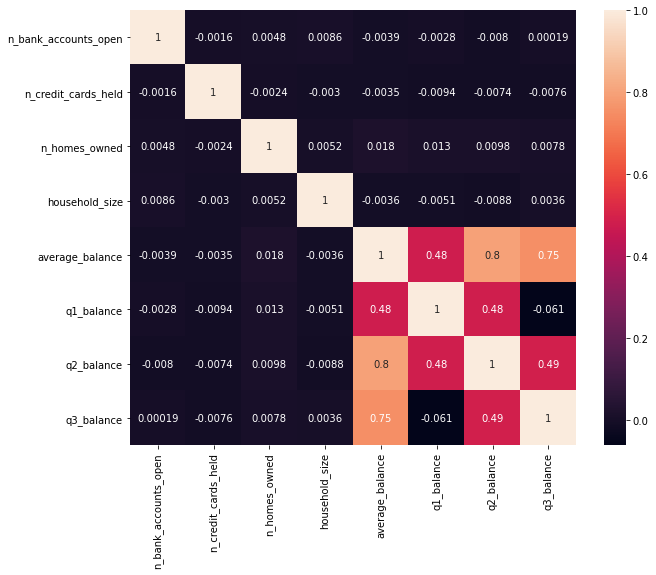

In [18]:
corr_matrix=num.corr(method='pearson')  #correlation
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()


In [19]:
# high correlation between average_balance and quarters is not significant as it is normal that the average balance is highly correlated
# to the balance devided by the quarters, but what we can observe is that the correlation to q1 is related to q2 and q2 is correlated
# to q3 at the same extent. Who starts the year with balance and has balance in q2 is most likely to have balance in q3. 

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
vif = {}
num = add_constant(num)
#data_corr

for i in np.arange(num.shape[1]):
    column_name = num.columns[i]
    value = variance_inflation_factor(np.array(num), i)
    vif[column_name] = value
vif

{'const': 38.51620790032293,
 'n_bank_accounts_open': 1.0001946995695357,
 'n_credit_cards_held': 1.000667058038174,
 'n_homes_owned': 1.0005767895574504,
 'household_size': 1.0002878543477862,
 'average_balance': 9.83811068524177,
 'q1_balance': 2.827390437232375,
 'q2_balance': 3.0441195806738883,
 'q3_balance': 5.28503207324439}

In [21]:
#No vif over standard(10), as avg balance is highest it could be a possible column to drop.

#### Data types

In [22]:
cat

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
customer_number,,,,,,,
1,No,Air Miles,Letter,High,No,High,No
2,No,Air Miles,Letter,Medium,No,Medium,Yes
3,No,Air Miles,Postcard,High,No,Medium,Yes
4,No,Air Miles,Letter,Medium,No,High,No
5,No,Air Miles,Letter,Medium,No,Medium,Yes
...,...,...,...,...,...,...,...
17996,No,Cash Back,Letter,High,No,Low,Yes
17997,No,Cash Back,Letter,High,No,Low,Yes
17998,No,Cash Back,Letter,High,No,Low,No


In [23]:
df_cont

,average_balance,q1_balance,q2_balance,q3_balance
customer_number,,,,
1,1160.75,1669.0,877.0,1095.0
2,147.25,39.0,106.0,78.0
3,276.50,367.0,352.0,145.0
4,1219.00,1578.0,1760.0,1119.0
5,1211.00,2140.0,1357.0,982.0
...,...,...,...,...
17996,167.50,136.0,65.0,71.0
17997,850.50,984.0,940.0,943.0
17998,1087.25,918.0,767.0,1170.0


In [24]:
df_discr

,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size
customer_number,,,,
1,1,2,1,4
2,1,2,2,5
3,2,2,1,2
4,2,1,1,4
5,1,2,1,6
...,...,...,...,...
17996,1,1,1,5
17997,1,3,1,3
17998,1,2,1,4


#### PLOTTING

In [25]:
# MASTER PLOT FUNCTION

def plot_df(df, plot_type):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np


    if plot_type == 'displot':
        cols=list(df.columns)
    
        for col in cols:
            sns.distplot(df[col])
            plt.show()

    elif plot_type == 'histplot':
        cols=list(df.columns)
    
        for col in cols:
            sns.histplot(df[col])
            plt.show()

    elif plot_type == 'boxplot':
        cols=list(df.columns)
    
        for col in cols:
            sns.boxplot(df[col])
            plt.show()
    
    
    elif plot_type == 'displot_hue_offer':
        cols=list(df.columns)

        for col in cols:
            temp_df = data.copy()
            temp_df["offer_accepted"] = data.offer_accepted.map({"Yes":1,"No":0})
            sns.displot(data=temp_df, x=df[col], hue="offer_accepted", palette = "Set2",fill=True,height=3,aspect=2, multiple="stack")
            
        
    elif plot_type == 'dist_box_plot':
        cols=list(df.columns)

        for col in cols:
            ax = sns.distplot(df[col])
            ax2 = ax.twinx()
            sns.boxplot(x=df[col], ax=ax2)
            ax2.set(ylim=(-.5, 10))
            
            


In [26]:
def plot_exclude(data, exclude):
    
    for i in data:
        
        if i != exclude:
        
            if len(data[i].unique()) > 10:
            
                sns.distplot(data[i], label = i)
                plt.show()
        
            else:
                sns.countplot(data[i], label = i)
                plt.show()

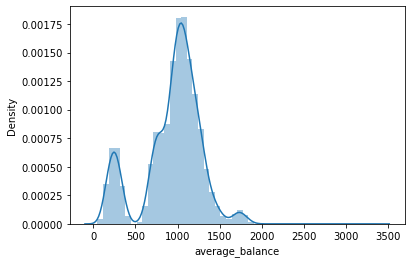

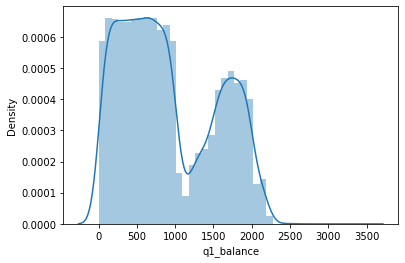

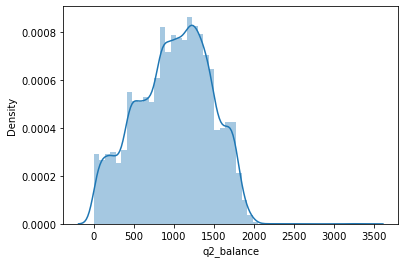

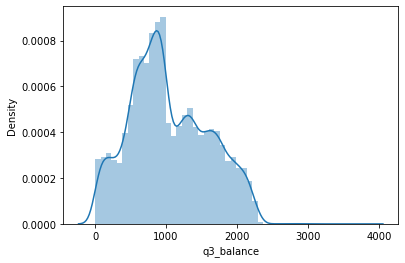

In [27]:
plot_df(df_cont,'displot')

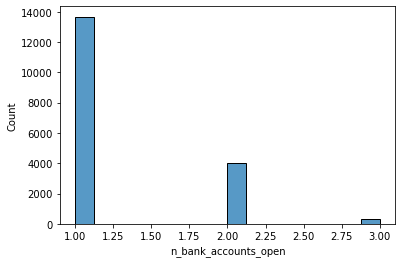

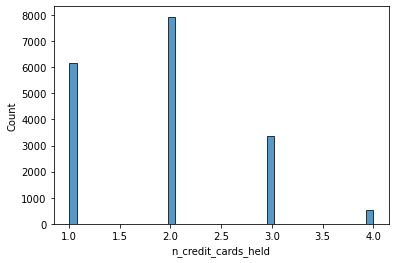

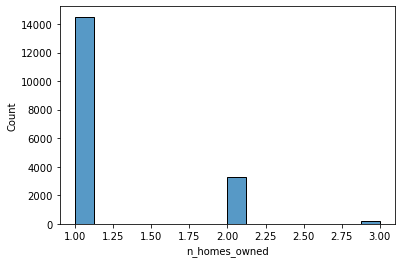

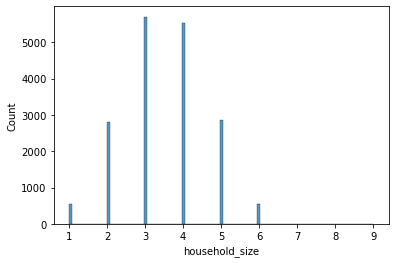

In [28]:
plot_df(df_discr,'histplot')

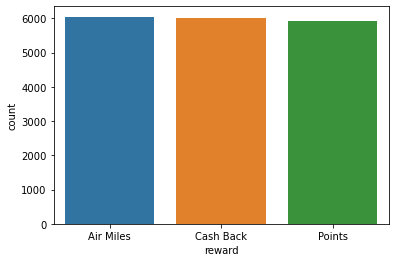

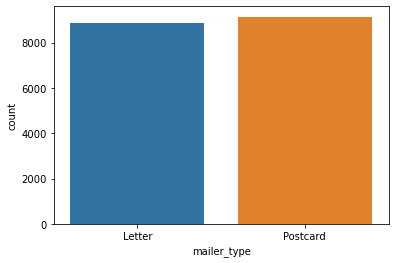

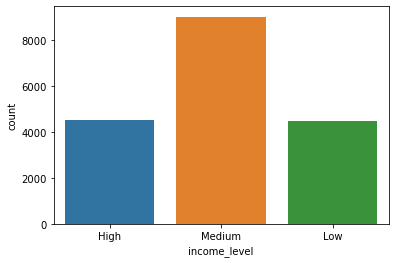

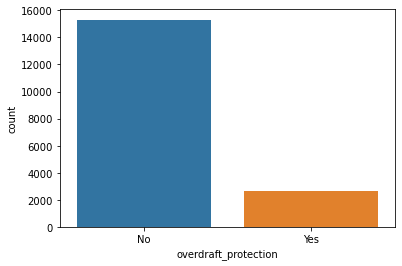

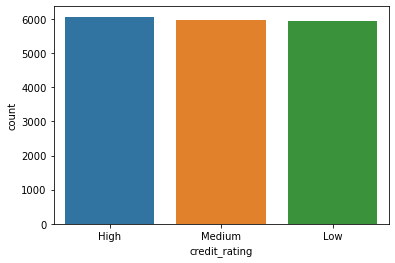

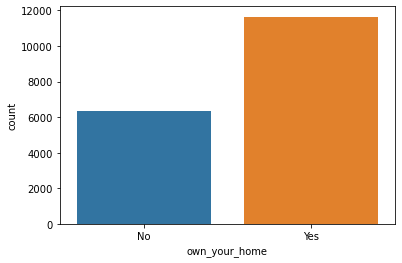

In [29]:
plot_exclude(cat,'offer_accepted')


In [30]:
#Check the number of unique classes
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    print("Number of classes in {}".format(col))
    print("Number of values: ", data[col].nunique())
    print("Unique values: ",data[col].unique())
    print('--------------------------')

Number of classes in offer_accepted
Number of values:  2
Unique values:  ['No' 'Yes']
--------------------------
Number of classes in reward
Number of values:  3
Unique values:  ['Air Miles' 'Cash Back' 'Points']
--------------------------
Number of classes in mailer_type
Number of values:  2
Unique values:  ['Letter' 'Postcard']
--------------------------
Number of classes in income_level
Number of values:  3
Unique values:  ['High' 'Medium' 'Low']
--------------------------
Number of classes in overdraft_protection
Number of values:  2
Unique values:  ['No' 'Yes']
--------------------------
Number of classes in credit_rating
Number of values:  3
Unique values:  ['High' 'Medium' 'Low']
--------------------------
Number of classes in own_your_home
Number of values:  2
Unique values:  ['No' 'Yes']
--------------------------


#### Comparing to target: card offers accepted 

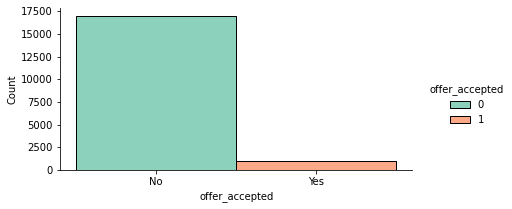

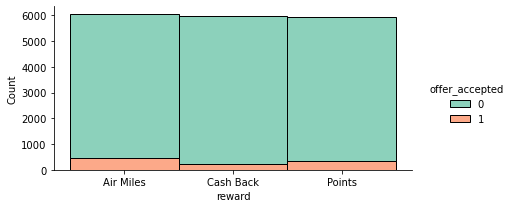

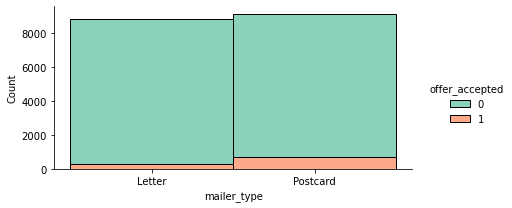

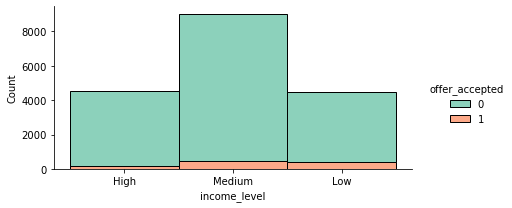

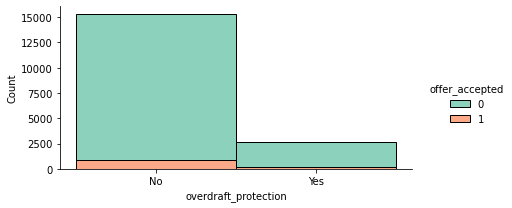

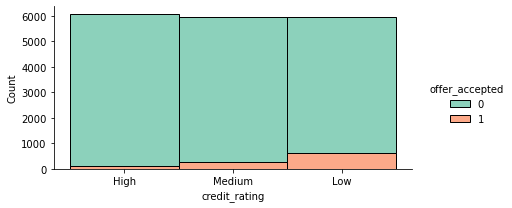

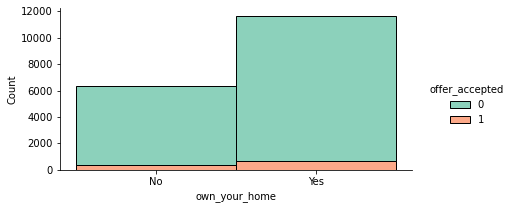

In [31]:
plot_df(cat,'displot_hue_offer')

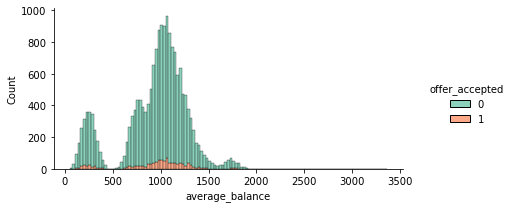

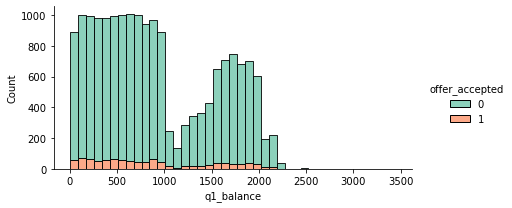

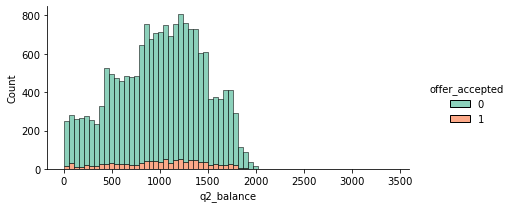

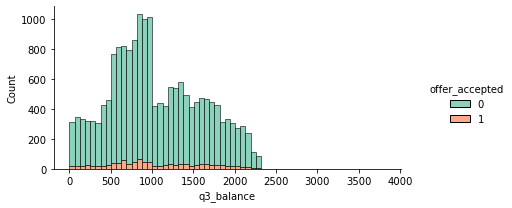

In [32]:
plot_df(df_cont,'displot_hue_offer')

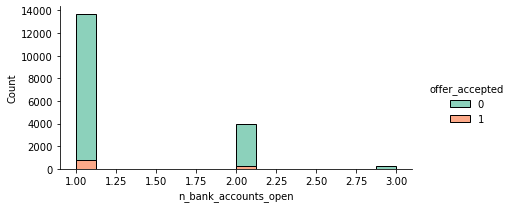

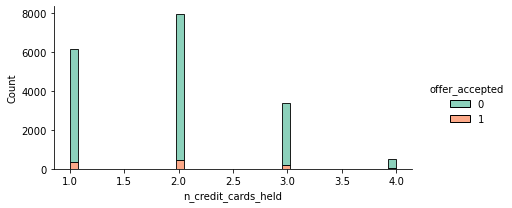

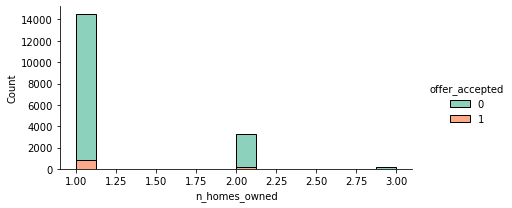

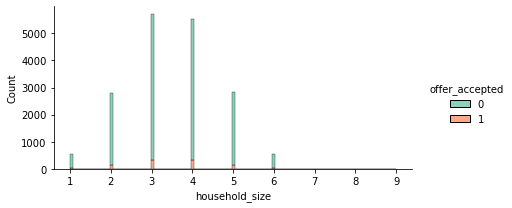

In [33]:
plot_df(df_discr,'displot_hue_offer')

#### Exploring: plotting box plot with dsiplot for IQR 

[(-0.5, 10.0)]

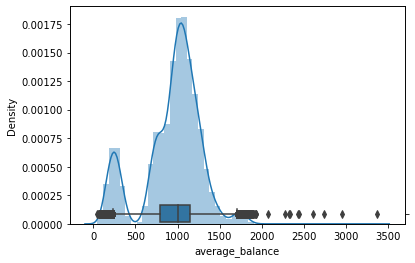

In [34]:
#Outlier inspections:

ax = sns.distplot(data['average_balance'])
ax2 = ax.twinx()
sns.boxplot(x=data['average_balance'], ax=ax2)
ax2.set(ylim=(-.5, 10))

[(-0.5, 10.0)]

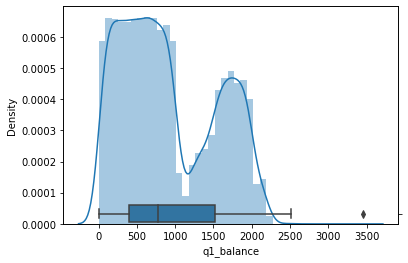

In [35]:
ax = sns.distplot(data['q1_balance'])
ax2 = ax.twinx()
sns.boxplot(x=data['q1_balance'], ax=ax2)
ax2.set(ylim=(-.5, 10)) 

[(-0.5, 10.0)]

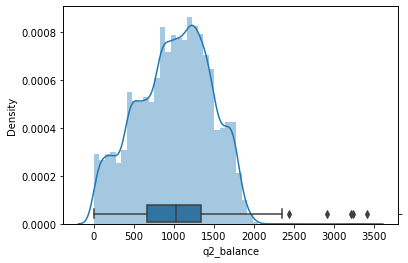

In [36]:
ax = sns.distplot(data['q2_balance'])
ax2 = ax.twinx()
sns.boxplot(x=data['q2_balance'], ax=ax2)
ax2.set(ylim=(-.5, 10))

[(-0.5, 10.0)]

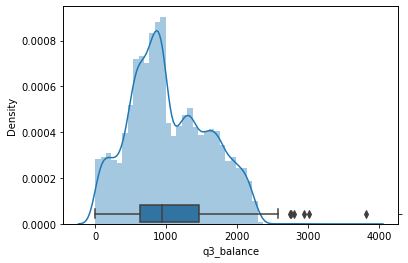

In [37]:
ax = sns.distplot(data['q3_balance'])
ax2 = ax.twinx()
sns.boxplot(x=data['q3_balance'], ax=ax2)
ax2.set(ylim=(-.5, 10))

In [38]:
#checking data

data.head(3)

,offer_accepted,reward,mailer_type,income_level,n_bank_accounts_open,overdraft_protection,credit_rating,n_credit_cards_held,n_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance
customer_number,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0


In [39]:
dtype_cat(list(data.columns))

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 1 to 18000
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        17976 non-null  object 
 1   reward                17976 non-null  object 
 2   mailer_type           17976 non-null  object 
 3   income_level          17976 non-null  object 
 4   n_bank_accounts_open  17976 non-null  int64  
 5   overdraft_protection  17976 non-null  object 
 6   credit_rating         17976 non-null  object 
 7   n_credit_cards_held   17976 non-null  int64  
 8   n_homes_owned         17976 non-null  int64  
 9   household_size        17976 non-null  int64  
 10  own_your_home         17976 non-null  object 
 11  average_balance       17976 non-null  float64
 12  q1_balance            17976 non-null  float64
 13  q2_balance            17976 non-null  float64
 14  q3_balance            17976 non-null  float64
dtypes: float64(4), int6

## Prepare for Modeling

#### DATA ENGINEERING

The upper wisker is at: 1701.88
The number of points outise the upper wisker is:  278


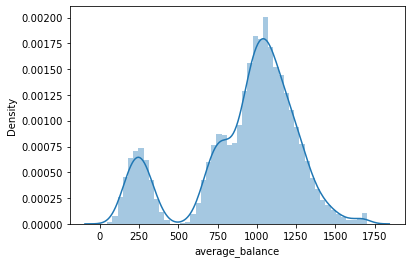

The upper wisker is at: 3154.50
The number of points outise the upper wisker is:  0


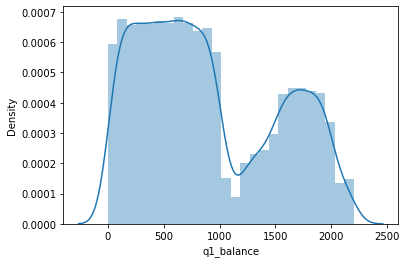

The upper wisker is at: 2332.00
The number of points outise the upper wisker is:  0


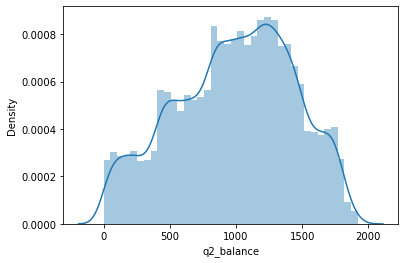

The upper wisker is at: 2634.88
The number of points outise the upper wisker is:  0


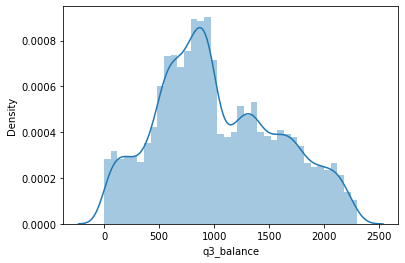

In [41]:
iqr = np.percentile(data['average_balance'],75) - np.percentile(data['average_balance'],25)
upper_limit = np.percentile(data['average_balance'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = data[data['average_balance'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))
data = data[data['average_balance'] < upper_limit]
sns.distplot(data['average_balance'])
plt.show()

iqr = np.percentile(data['q1_balance'],75) - np.percentile(data['q1_balance'],25)
upper_limit = np.percentile(data['q1_balance'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = data[data['q1_balance'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))
data = data[data['q1_balance'] < upper_limit]
sns.distplot(data['q1_balance'])
plt.show()

iqr = np.percentile(data['q2_balance'],75) - np.percentile(data['q2_balance'],25)
upper_limit = np.percentile(data['q2_balance'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = data[data['q2_balance'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))
data = data[data['q2_balance'] < upper_limit]
sns.distplot(data['q2_balance'])
plt.show()

#Q4
iqr = np.percentile(data['q3_balance'],75) - np.percentile(data['q3_balance'],25)
upper_limit = np.percentile(data['q3_balance'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = data[data['q3_balance'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))
data = data[data['q3_balance'] < upper_limit]
sns.distplot(data['q3_balance'])
plt.show()

#### Binning

In [42]:
#Binning avg balance - per frequency
avg_bal_label = 1,2,3
avg_bins = [0, 500, 1500, 2000]
data['avg_bal_binfreq3'] = pd.cut(data['average_balance'], avg_bins, labels = avg_bal_label)


#Binning household size
housesize_bins = [0,3,6,9]
housesize_label = 1,2,3
data['house_size_bin3'] = pd.cut(data['household_size'], housesize_bins, labels = housesize_label)

#Binning q1-q3 avg balance
#avg_bal_label4 = [1,2,3,4] #group labels
#data['q1_bal_bin4'] = pd.cut(data['q1_balance'],4, labels=avg_bal_label)
#data['q2_bal_bin4'] = pd.cut(data['q2_balance'],4, labels=avg_bal_label)
#data['q3_bal_bin4'] = pd.cut(data['q3_balance'],4, labels=avg_bal_label)


print("'household_size', 'average_balance' BINNED")
data.head(3)

'household_size', 'average_balance' BINNED


,offer_accepted,reward,mailer_type,income_level,n_bank_accounts_open,overdraft_protection,credit_rating,n_credit_cards_held,n_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,avg_bal_binfreq3,house_size_bin3
customer_number,,,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,2,2
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,1,2
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,1,1


In [43]:
data.isna().sum()

offer_accepted          0
reward                  0
mailer_type             0
income_level            0
n_bank_accounts_open    0
overdraft_protection    0
credit_rating           0
n_credit_cards_held     0
n_homes_owned           0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
avg_bal_binfreq3        0
house_size_bin3         0
dtype: int64

In [44]:
data.drop(['household_size', 'average_balance'], axis=1, inplace= True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17698 entries, 1 to 18000
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   offer_accepted        17698 non-null  object  
 1   reward                17698 non-null  object  
 2   mailer_type           17698 non-null  object  
 3   income_level          17698 non-null  object  
 4   n_bank_accounts_open  17698 non-null  int64   
 5   overdraft_protection  17698 non-null  object  
 6   credit_rating         17698 non-null  object  
 7   n_credit_cards_held   17698 non-null  int64   
 8   n_homes_owned         17698 non-null  int64   
 9   own_your_home         17698 non-null  object  
 10  q1_balance            17698 non-null  float64 
 11  q2_balance            17698 non-null  float64 
 12  q3_balance            17698 non-null  float64 
 13  avg_bal_binfreq3      17698 non-null  category
 14  house_size_bin3       17698 non-null  category
dtypes:

In [46]:
data['avg_bal_binfreq3'] = data['avg_bal_binfreq3'].astype(float)
data['house_size_bin3'] = data['house_size_bin3'].astype(float)

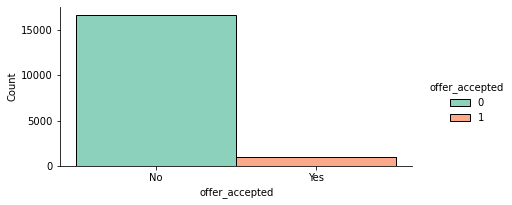

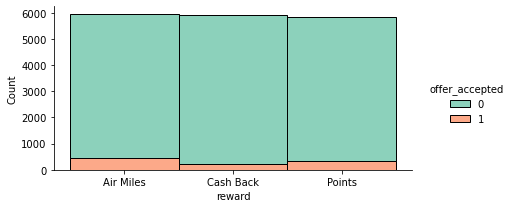

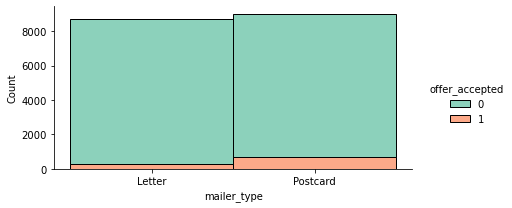

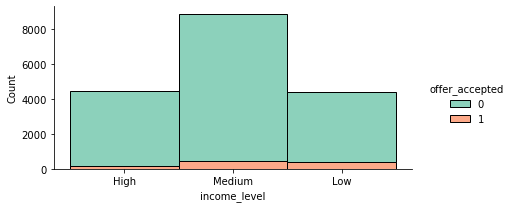

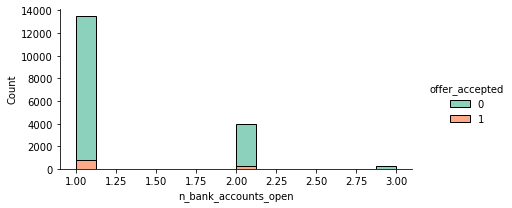

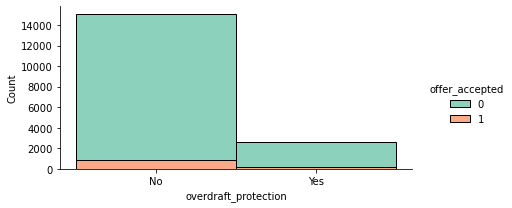

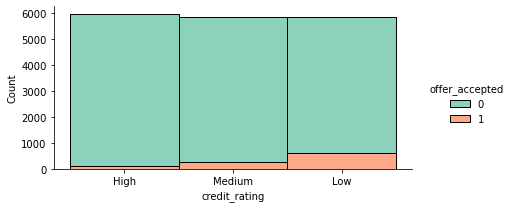

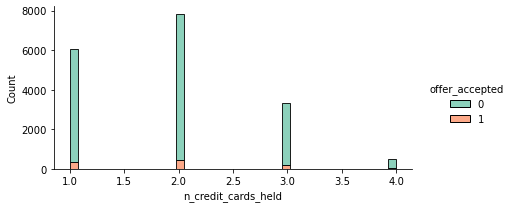

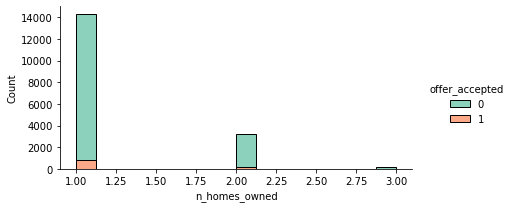

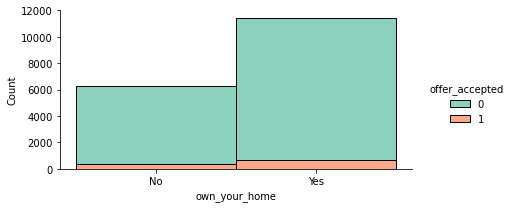

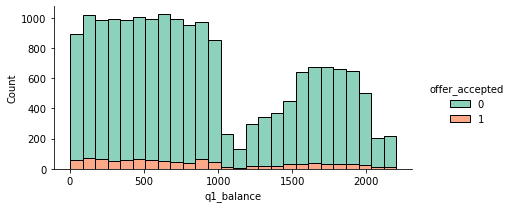

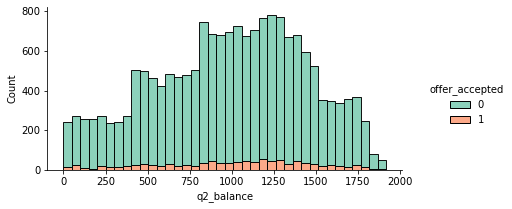

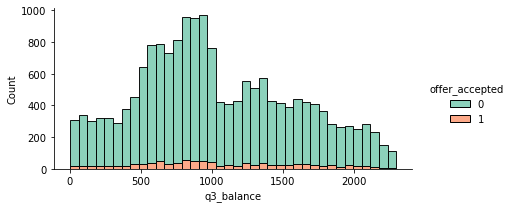

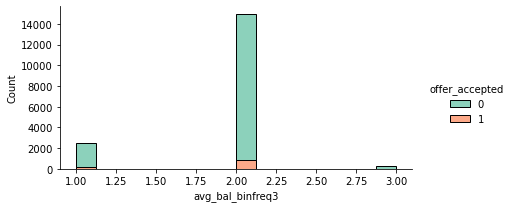

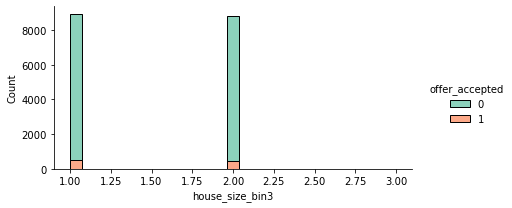

In [47]:
plot_df(data,'displot_hue_offer')

In [48]:
data = data[data['avg_bal_binfreq3'] != 3]

#data = data[data['avg_bal_bin4'] != 4]
#data = data[data['n_credit_cards_held'] != 1]
#data = data[data['credit_rating'] != 'High']
#data = data[data['credit_rating'] != 'Medium']
#data = data[data['reward'] != 'Cash Back']
#data = data[data['overdraft_protection'] != "Yes"]

### Feature SELECTION: Drop a row by condition

#### Defining x, y split:

In [49]:
X = data.drop(['offer_accepted'], axis = 1)
y = data['offer_accepted']

In [50]:
data = data.drop('offer_accepted', axis = 1)

#### Encoding

In [51]:
#Encode: ORDINALLY

def ordcat(data):
    cols=list(data)
    
    for col in cols:
        if ( col == "income_level"):  
            income_dict = {"Low" : 0, "Medium" : 1, "High" : 2}
            data['income_level'] = data.income_level.map(income_dict)
            print(col, " column ordinally encoded!")

        elif ( col == "credit_rating"):  
            credit_rat_dict = {"Low" : 0, "Medium" : 1, "High" : 2}
            data["credit_rating"] = data.credit_rating.map(credit_rat_dict)
            print(col, " column ordinally encoded!")
        
            
            
    return data
data = ordcat(data)

income_level  column ordinally encoded!
credit_rating  column ordinally encoded!


In [52]:
#Encode: DUMMIES

data=pd.get_dummies(data,drop_first=True)
print("data encoded with dummies!") 

data encoded with dummies!


#### CHECKING DATA

In [53]:
data.head(3)

,income_level,n_bank_accounts_open,credit_rating,n_credit_cards_held,n_homes_owned,q1_balance,q2_balance,q3_balance,avg_bal_binfreq3,house_size_bin3,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
customer_number,,,,,,,,,,,,,,,
1,2,1,2,2,1,1669.0,877.0,1095.0,2.0,2.0,0,0,0,0,0
2,1,1,1,2,2,39.0,106.0,78.0,1.0,2.0,0,0,0,0,1
3,2,2,1,2,1,367.0,352.0,145.0,1.0,1.0,0,0,1,0,1


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17461 entries, 1 to 18000
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   income_level              17461 non-null  int64  
 1   n_bank_accounts_open      17461 non-null  int64  
 2   credit_rating             17461 non-null  int64  
 3   n_credit_cards_held       17461 non-null  int64  
 4   n_homes_owned             17461 non-null  int64  
 5   q1_balance                17461 non-null  float64
 6   q2_balance                17461 non-null  float64
 7   q3_balance                17461 non-null  float64
 8   avg_bal_binfreq3          17461 non-null  float64
 9   house_size_bin3           17461 non-null  float64
 10  reward_Cash Back          17461 non-null  uint8  
 11  reward_Points             17461 non-null  uint8  
 12  mailer_type_Postcard      17461 non-null  uint8  
 13  overdraft_protection_Yes  17461 non-null  uint8  
 14  own_yo

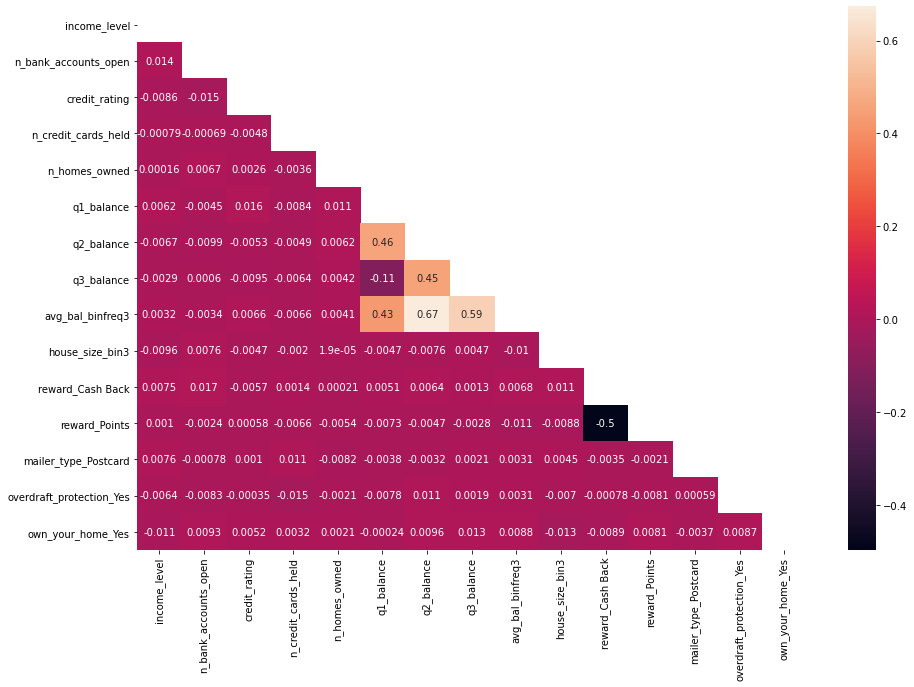

In [55]:
#### Correlation check

correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


Feature: 0, Score: -0.58573
Feature: 1, Score: -0.14872
Feature: 2, Score: -0.95845
Feature: 3, Score: -0.11431
Feature: 4, Score: -0.17679
Feature: 5, Score: -0.00011
Feature: 6, Score: 0.00010
Feature: 7, Score: 0.00011
Feature: 8, Score: -0.32033
Feature: 9, Score: -0.25719
Feature: 10, Score: -0.70555
Feature: 11, Score: -0.14890
Feature: 12, Score: 0.88217
Feature: 13, Score: -0.05710
Feature: 14, Score: -0.04947


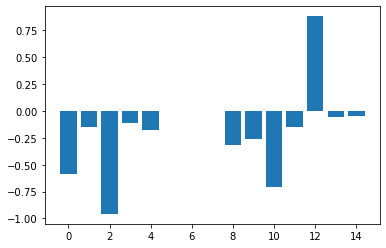

In [56]:
#Feature Importance

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


model = LogisticRegression()
model.fit(data, y)
importance = model.coef_[0]


for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


----

##### SETS DF ready to test

In [57]:
#Test MODEL 1
data1 = data.copy()
data1.head(3)

,income_level,n_bank_accounts_open,credit_rating,n_credit_cards_held,n_homes_owned,q1_balance,q2_balance,q3_balance,avg_bal_binfreq3,house_size_bin3,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
customer_number,,,,,,,,,,,,,,,
1,2,1,2,2,1,1669.0,877.0,1095.0,2.0,2.0,0,0,0,0,0
2,1,1,1,2,2,39.0,106.0,78.0,1.0,2.0,0,0,0,0,1
3,2,2,1,2,1,367.0,352.0,145.0,1.0,1.0,0,0,1,0,1


In [58]:
X = data

-----
### Modeling

In [59]:
def classification_model(X,y,tomek,balancer,scaler,neighbors):
    tl = TomekLinks('majority')
    rus = RandomUnderSampler()
    Ros = RandomOverSampler()
    smote = SMOTE()
    ftwo_scorer = make_scorer(cohen_kappa_score)

#Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#Scaler
    if scaler=="StandardScaler":
        scaler_x = StandardScaler().fit(X_train)
        X_train_scaled = pd.DataFrame(scaler_x.transform(X_train),columns=X.columns)
        X_test_scaled = pd.DataFrame(scaler_x.transform(X_test),columns=X.columns)
    elif scaler=="MinMax":
        scaler_x = MinMaxScaler().fit(X_train)
        X_train_scaled = pd.DataFrame(scaler_x.transform(X_train),columns=X.columns)
        X_test_scaled = pd.DataFrame(scaler_x.transform(X_test),columns=X.columns)
    elif scaler=="Normalizer":
        scaler_x = Normalizer().fit(X_train)
        X_train_scaled = pd.DataFrame(scaler_x.transform(X_train),columns=X.columns)
        X_test_scaled = pd.DataFrame(scaler_x.transform(X_test),columns=X.columns)
    elif scaler=="power":
        pt = PowerTransformer()
        powertrain=pt.fit(X_train)
        powertrainl=(pt.lambdas_)
        powertrain=pt.transform(X_train)
        X_train_scaled=pd.DataFrame(powertrain,columns=X_train.columns)
        powertest=pt.transform(X_test)
        X_test_scaled=pd.DataFrame(powertest,columns=X_test.columns)
    elif scaler=="None":
        X_train_scaled=X_train
        X_test_scaled=X_test

#sample balance
    if tomek=="tomek applied":
        X_train_scaled_tom, y_train_scaled_tom=tl.fit_sample(X_train_scaled, y_train)
    elif tomek=="tomek not applied":
        X_train_scaled_tom,y_train_scaled_tom=X_train_scaled,y_train
    if balancer=="smote sample":
        X_train_scaled_bal, y_train_scaled_bal = smote.fit_sample(X_train_scaled_tom, y_train_scaled_tom)
    elif balancer=="over sample":
        X_train_scaled_bal, y_train_scaled_bal = Ros.fit_sample(X_train_scaled_tom, y_train_scaled_tom)
    elif balancer=="under sample":
        X_train_scaled_bal, y_train_scaled_bal = rus.fit_sample(X_train_scaled_tom, y_train_scaled_tom)
    elif balancer=="unbalanced":
        X_train_scaled_bal,y_train_scaled_bal=X_train_scaled_tom,y_train_scaled_tom

#models
    #lR
    log_ = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', class_weight = {'Yes': 0.2, 'No': 0.8}, C= 0.1)
    log_classification = log_.fit(X_train_scaled_bal, y_train_scaled_bal)
    log_predictions = log_classification.predict(X_test_scaled)

    #KNN
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn_classification = knn.fit(X_train_scaled_bal, y_train_scaled_bal)
    knn_predictions = knn.predict(X_test_scaled)

    #Forest
    clf = RandomForestClassifier(n_estimators=75,min_samples_split= 2)
    clf_classification = clf.fit(X_train_scaled_bal, y_train_scaled_bal)
    clf_predictions = clf.predict(X_test_scaled)
    #AdaBoost
    ada_clf = AdaBoostClassifier()
    ada_clf_classification = ada_clf.fit(X_train_scaled_bal, y_train_scaled_bal)
    ada_clf_predictions = ada_clf.predict(X_test_scaled)

    #SVC
    svc_clf = svm.SVC()
    svc_clf_classification = svc_clf.fit(X_train_scaled_bal, y_train_scaled_bal)
    svc_clf_predictions = svc_clf.predict(X_test_scaled)

#printing results
    print("| Logistic Regression Model Results")
    print("With:: - Sample balancing: ", tomek,",", balancer,", - Scaler: ", scaler)
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, log_predictions))
    print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, log_predictions)))
    print(cohen_kappa_score)
    print(confusion_matrix(y_test, log_predictions))
    plot_confusion_matrix(log_classification, X_test_scaled, y_test)
    plt.show()
    print("------ Classification_Report------ ")
    print(classification_report(y_test, log_predictions))
    print("matthews_corrcoef: ", matthews_corrcoef(y_test, log_predictions))    
    print(" =================================================================== ")
    
    print("| KNN Model Results")
    print("With:: - Sample balancing: ", tomek,",", balancer,", - Scaler: ", scaler,", KNN N", neighbors)
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, knn_predictions))
    print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, knn_predictions)))
    print(confusion_matrix(y_test, knn_predictions))
    plot_confusion_matrix(knn_classification, X_test_scaled, y_test)
    plt.show()
    print("------ Classification_Report------ ")
    print(classification_report(y_test, knn_predictions))
    print("matthews_corrcoef: ", matthews_corrcoef(y_test, knn_predictions))
    print(" =================================================================== ")
    
    print("| Random Forest Classifier Results")
    print("With:: - Sample balancing: ", tomek,",", balancer,", - Scaler: ", scaler)
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, clf_predictions))
    print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, clf_predictions)))
    print(confusion_matrix(y_test, clf_predictions))
    plot_confusion_matrix(clf_classification, X_test_scaled, y_test)
    plt.show()
    print("------ Classification_Report------ ")
    print(classification_report(y_test, clf_predictions))
    print("matthews_corrcoef: ", matthews_corrcoef(y_test, clf_predictions))
    print(" =================================================================== ")
    
    print("| AdaBoostClassifier Results")
    print("With:: - Sample balancing: ", tomek,",", balancer,", - Scaler: ", scaler)
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, ada_clf_predictions))
    print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, ada_clf_predictions)))
    print(confusion_matrix(y_test, ada_clf_predictions))
    plot_confusion_matrix(ada_clf_classification, X_test_scaled, y_test)
    plt.show()
    print("------ Classification_Report------ ")
    print(classification_report(y_test, ada_clf_predictions))
    print("matthews_corrcoef: ", matthews_corrcoef(y_test, ada_clf_predictions))
    print(" =================================================================== ")
    
    print("| Support Vector Machines Results")
    print("With:: - Sample balancing: ", tomek,",", balancer,", - Scaler: ", scaler)
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, svc_clf_predictions))
    print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, svc_clf_predictions)))
    print(confusion_matrix(y_test, svc_clf_predictions))
    plot_confusion_matrix(svc_clf_classification, X_test_scaled, y_test)
    plt.show()
    print("------ Classification_Report------ ")
    print(classification_report(y_test, svc_clf_predictions))
    print("matthews_corrcoef: ", matthews_corrcoef(y_test, svc_clf_predictions))
    return X_train_scaled_bal, y_train_scaled_bal

-----

### Classification Model Evaluation

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.90 
The Kappa of your model is: 0.18
<function cohen_kappa_score at 0x000002233DDCCDC0>
[[4664  261]
 [ 238   76]]


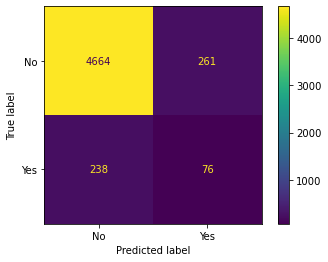

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.95      0.95      4925
         Yes       0.23      0.24      0.23       314

    accuracy                           0.90      5239
   macro avg       0.59      0.59      0.59      5239
weighted avg       0.91      0.90      0.91      5239

matthews_corrcoef:  0.18290585616544677
| KNN Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  StandardScaler , KNN N 2
The accuracy of the model on test set is: 0.86 
The Kappa of your model is: 0.06
[[4466  459]
 [ 261   53]]


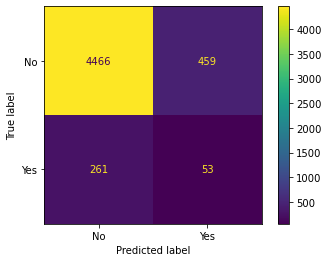

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.91      0.93      4925
         Yes       0.10      0.17      0.13       314

    accuracy                           0.86      5239
   macro avg       0.52      0.54      0.53      5239
weighted avg       0.89      0.86      0.88      5239

matthews_corrcoef:  0.06042477931758581
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.92 
The Kappa of your model is: 0.07
[[4794  131]
 [ 289   25]]


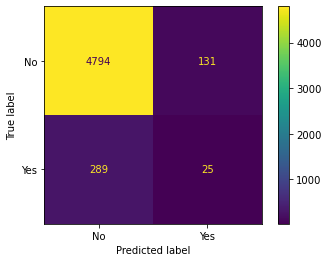

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.97      0.96      4925
         Yes       0.16      0.08      0.11       314

    accuracy                           0.92      5239
   macro avg       0.55      0.53      0.53      5239
weighted avg       0.90      0.92      0.91      5239

matthews_corrcoef:  0.07404161581451045
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.83 
The Kappa of your model is: 0.15
[[4212  713]
 [ 186  128]]


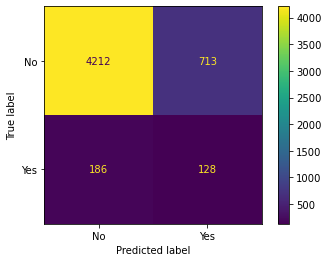

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.96      0.86      0.90      4925
         Yes       0.15      0.41      0.22       314

    accuracy                           0.83      5239
   macro avg       0.55      0.63      0.56      5239
weighted avg       0.91      0.83      0.86      5239

matthews_corrcoef:  0.16997546126195706
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.77 
The Kappa of your model is: 0.12
[[3883 1042]
 [ 162  152]]


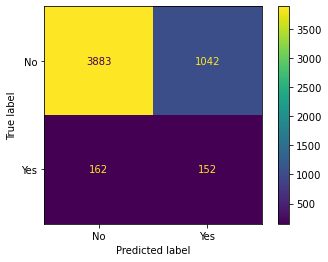

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.96      0.79      0.87      4925
         Yes       0.13      0.48      0.20       314

    accuracy                           0.77      5239
   macro avg       0.54      0.64      0.53      5239
weighted avg       0.91      0.77      0.83      5239

matthews_corrcoef:  0.15419757026303185


In [62]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(X,y,"tomek applied","smote sample","StandardScaler",2)

In [66]:
grid_search(X_train_scaled_bal, y_train_scaled_bal,'lr')

{'C': 0.001, 'class_weight': None, 'solver': 'saga'} 0.4178084971517163 LogisticRegression(C=0.001, solver='saga')


In [65]:
def grid_search (X_train_scaled_bal,y_train_scaled_bal,model):
    ftwo_scorer = make_scorer(cohen_kappa_score)

#models:
    if model=='lr':
        grid = GridSearchCV(LogisticRegression(), param_grid={'solver': ['lbfgs', 'saga'], 'C': [1,0.1,0.001], 'class_weight':[{'Yes': 0.2, 'No': 0.8},'balanced',None,{'Yes': 0.1, 'No': 1.6}]},scoring=ftwo_scorer, n_jobs =2)
        grid.fit(X_train_scaled_bal, y_train_scaled_bal)
        print(grid.best_params_,grid.best_score_,grid.best_estimator_)
    elif model=='knn':
        gridknn = GridSearchCV(KNeighborsClassifier(), param_grid={},scoring=ftwo_scorer, n_jobs =2)
        gridknn.fit(X_train_scaled_bal, y_train_scaled_bal)
        print(gridknn.best_params_,gridknn.best_score_,gridknn.best_estimator_)
    elif model=='rfc':
        gridf = GridSearchCV(RandomForestClassifier(), param_grid={'n_estimators':[25,50,75,100,150],'class_weight':['balanced', 'balanced_subsample',None],'min_samples_split':[1,2,3,4,5]}
                         ,scoring=ftwo_scorer, n_jobs =2)
        gridf.fit(X_train_scaled_bal, y_train_scaled_bal)
        print(gridf.best_params_,gridf.best_score_,gridf.best_estimator_)    
    elif model=='ada': 
        gridada = GridSearchCV(AdaBoostClassifier(), 
                          param_grid={'base_estimator':[object,None],
                                      'n_estimators':[25,50,75,100,150],
                                      'learning_rate':[1,2,3],'random_state':[int,None]},
                        scoring=ftwo_scorer, n_jobs =2
                          )
        gridada.fit(X_train_scaled_bal, y_train_scaled_bal)
        print(gridada.best_params_,gridada.best_score_,gridada.best_estimator_)                        
    elif model=='svc':
        gridsvc = GridSearchCV(svm.SVC(), param_grid={},scoring=ftwo_scorer, n_jobs =2)
        gridsvc.fit(X_train_scaled_bal, y_train_scaled_bal)
        print(gridsvc.best_params_,gridsvc.best_score_,gridsvc.best_estimator_)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.91 
The Kappa of your model is: 0.18
<function cohen_kappa_score at 0x000002233DDCCDC0>
[[4670  255]
 [ 241   73]]


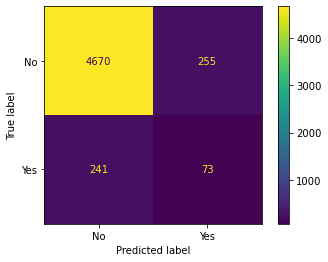

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.95      0.95      4925
         Yes       0.22      0.23      0.23       314

    accuracy                           0.91      5239
   macro avg       0.59      0.59      0.59      5239
weighted avg       0.91      0.91      0.91      5239

matthews_corrcoef:  0.17706064992763648
| KNN Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  power , KNN N 2
The accuracy of the model on test set is: 0.86 
The Kappa of your model is: 0.06
[[4473  452]
 [ 261   53]]


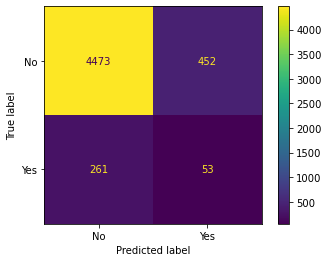

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.91      0.93      4925
         Yes       0.10      0.17      0.13       314

    accuracy                           0.86      5239
   macro avg       0.52      0.54      0.53      5239
weighted avg       0.89      0.86      0.88      5239

matthews_corrcoef:  0.06194026579220137
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.92 
The Kappa of your model is: 0.06
[[4781  144]
 [ 289   25]]


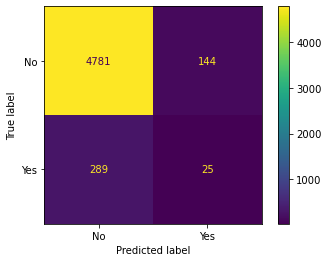

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.97      0.96      4925
         Yes       0.15      0.08      0.10       314

    accuracy                           0.92      5239
   macro avg       0.55      0.53      0.53      5239
weighted avg       0.90      0.92      0.91      5239

matthews_corrcoef:  0.06768187111340604
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.84 
The Kappa of your model is: 0.15
[[4287  638]
 [ 196  118]]


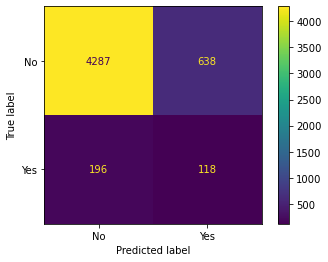

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.96      0.87      0.91      4925
         Yes       0.16      0.38      0.22       314

    accuracy                           0.84      5239
   macro avg       0.56      0.62      0.57      5239
weighted avg       0.91      0.84      0.87      5239

matthews_corrcoef:  0.16634289638830593
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.77 
The Kappa of your model is: 0.11
[[3911 1014]
 [ 171  143]]


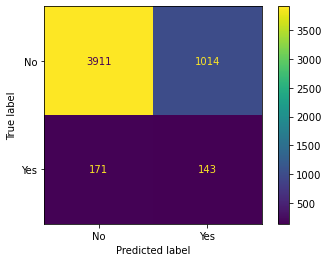

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.96      0.79      0.87      4925
         Yes       0.12      0.46      0.19       314

    accuracy                           0.77      5239
   macro avg       0.54      0.62      0.53      5239
weighted avg       0.91      0.77      0.83      5239

matthews_corrcoef:  0.14278415748156228


In [63]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(X,y,"tomek applied","smote sample","power",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.91 
The Kappa of your model is: 0.17
<function cohen_kappa_score at 0x000002233DDCCDC0>
[[4700  225]
 [ 247   67]]


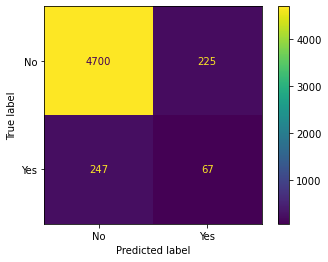

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.95      0.95      4925
         Yes       0.23      0.21      0.22       314

    accuracy                           0.91      5239
   macro avg       0.59      0.58      0.59      5239
weighted avg       0.91      0.91      0.91      5239

matthews_corrcoef:  0.17350582681601273
| KNN Model Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  StandardScaler , KNN N 2
The accuracy of the model on test set is: 0.87 
The Kappa of your model is: 0.04
[[4528  397]
 [ 273   41]]


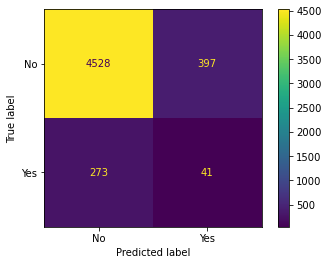

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.92      0.93      4925
         Yes       0.09      0.13      0.11       314

    accuracy                           0.87      5239
   macro avg       0.52      0.52      0.52      5239
weighted avg       0.89      0.87      0.88      5239

matthews_corrcoef:  0.0428472743982596
| Random Forest Classifier Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.92 
The Kappa of your model is: 0.04
[[4803  122]
 [ 297   17]]


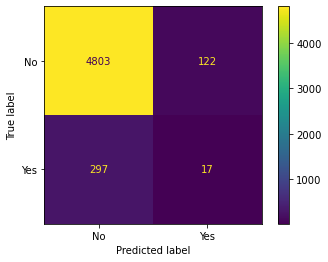

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.98      0.96      4925
         Yes       0.12      0.05      0.08       314

    accuracy                           0.92      5239
   macro avg       0.53      0.51      0.52      5239
weighted avg       0.89      0.92      0.91      5239

matthews_corrcoef:  0.04337685034393666
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.83 
The Kappa of your model is: 0.14
[[4236  689]
 [ 192  122]]


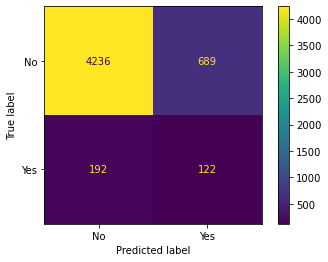

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.96      0.86      0.91      4925
         Yes       0.15      0.39      0.22       314

    accuracy                           0.83      5239
   macro avg       0.55      0.62      0.56      5239
weighted avg       0.91      0.83      0.86      5239

matthews_corrcoef:  0.16316187501257573
| Support Vector Machines Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.77 
The Kappa of your model is: 0.11
[[3870 1055]
 [ 164  150]]


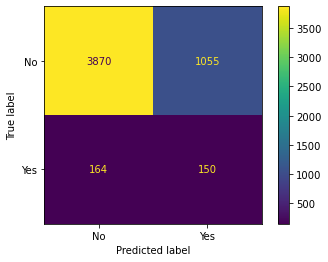

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.96      0.79      0.86      4925
         Yes       0.12      0.48      0.20       314

    accuracy                           0.77      5239
   macro avg       0.54      0.63      0.53      5239
weighted avg       0.91      0.77      0.82      5239

matthews_corrcoef:  0.14861987292700257


In [64]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(X,y,"tomek not applied","smote sample","StandardScaler",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  None
The accuracy of the model on test set is: 0.90 
The Kappa of your model is: 0.12
<function cohen_kappa_score at 0x000002233DDCCDC0>
[[4648  277]
 [ 257   57]]


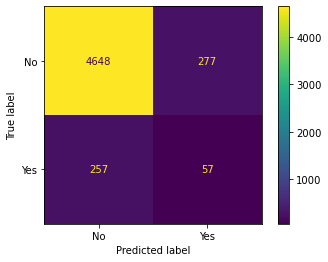

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.94      0.95      4925
         Yes       0.17      0.18      0.18       314

    accuracy                           0.90      5239
   macro avg       0.56      0.56      0.56      5239
weighted avg       0.90      0.90      0.90      5239

matthews_corrcoef:  0.1217234648009344
| KNN Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  None , KNN N 2
The accuracy of the model on test set is: 0.80 
The Kappa of your model is: -0.02
[[4177  748]
 [ 275   39]]


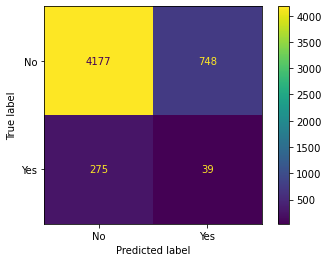

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.85      0.89      4925
         Yes       0.05      0.12      0.07       314

    accuracy                           0.80      5239
   macro avg       0.49      0.49      0.48      5239
weighted avg       0.88      0.80      0.84      5239

matthews_corrcoef:  -0.0183857115081297
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  None
The accuracy of the model on test set is: 0.90 
The Kappa of your model is: 0.09
[[4680  245]
 [ 271   43]]


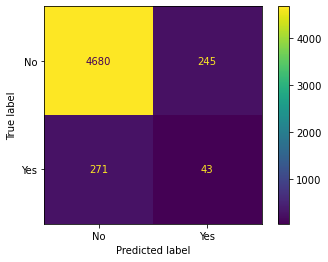

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.95      0.95      4925
         Yes       0.15      0.14      0.14       314

    accuracy                           0.90      5239
   macro avg       0.55      0.54      0.55      5239
weighted avg       0.90      0.90      0.90      5239

matthews_corrcoef:  0.09080801849473813
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  None
The accuracy of the model on test set is: 0.85 
The Kappa of your model is: 0.13
[[4335  590]
 [ 214  100]]


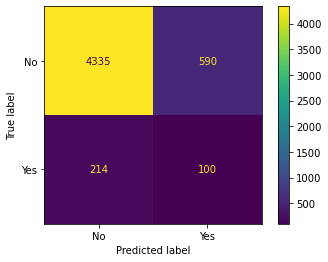

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.88      0.92      4925
         Yes       0.14      0.32      0.20       314

    accuracy                           0.85      5239
   macro avg       0.55      0.60      0.56      5239
weighted avg       0.90      0.85      0.87      5239

matthews_corrcoef:  0.13945282008171225
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  None
The accuracy of the model on test set is: 0.59 
The Kappa of your model is: 0.02
[[2922 2003]
 [ 166  148]]


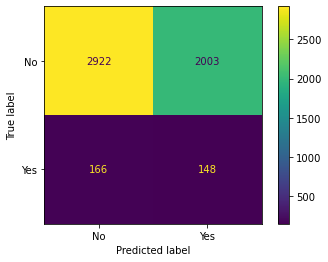

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.59      0.73      4925
         Yes       0.07      0.47      0.12       314

    accuracy                           0.59      5239
   macro avg       0.51      0.53      0.42      5239
weighted avg       0.89      0.59      0.69      5239

matthews_corrcoef:  0.031188232673231023


In [67]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(X,y,"tomek applied","smote sample","None",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.93 
The Kappa of your model is: 0.12
<function cohen_kappa_score at 0x000002233DDCCDC0>
[[4815  110]
 [ 280   34]]


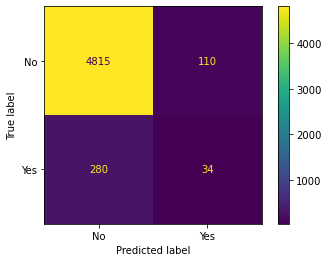

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.98      0.96      4925
         Yes       0.24      0.11      0.15       314

    accuracy                           0.93      5239
   macro avg       0.59      0.54      0.55      5239
weighted avg       0.90      0.93      0.91      5239

matthews_corrcoef:  0.12477752767615304
| KNN Model Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  StandardScaler , KNN N 2
The accuracy of the model on test set is: 0.75 
The Kappa of your model is: 0.04
[[3800 1125]
 [ 209  105]]


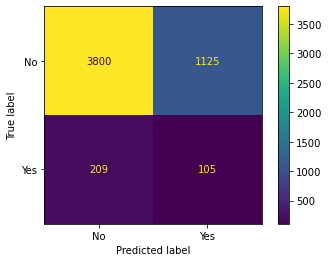

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.77      0.85      4925
         Yes       0.09      0.33      0.14       314

    accuracy                           0.75      5239
   macro avg       0.52      0.55      0.49      5239
weighted avg       0.90      0.75      0.81      5239

matthews_corrcoef:  0.05934363972599569
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.63 
The Kappa of your model is: 0.09
[[3090 1835]
 [  92  222]]


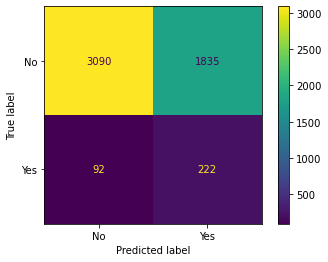

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.97      0.63      0.76      4925
         Yes       0.11      0.71      0.19       314

    accuracy                           0.63      5239
   macro avg       0.54      0.67      0.47      5239
weighted avg       0.92      0.63      0.73      5239

matthews_corrcoef:  0.16255103976547763
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.66 
The Kappa of your model is: 0.11
[[3264 1661]
 [  96  218]]


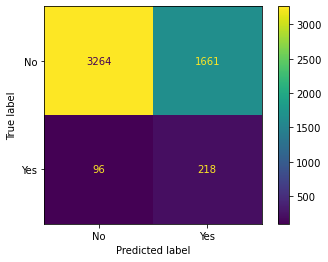

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.97      0.66      0.79      4925
         Yes       0.12      0.69      0.20       314

    accuracy                           0.66      5239
   macro avg       0.54      0.68      0.49      5239
weighted avg       0.92      0.66      0.75      5239

matthews_corrcoef:  0.17669067523848495
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.63 
The Kappa of your model is: 0.10
[[3072 1853]
 [  78  236]]


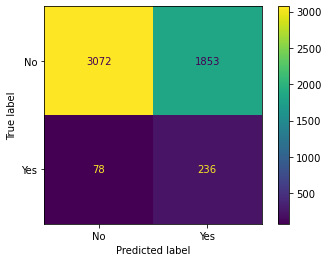

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.98      0.62      0.76      4925
         Yes       0.11      0.75      0.20       314

    accuracy                           0.63      5239
   macro avg       0.54      0.69      0.48      5239
weighted avg       0.92      0.63      0.73      5239

matthews_corrcoef:  0.1819610200554063


In [68]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(X,y,"tomek applied","under sample","StandardScaler",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  Normalizer
The accuracy of the model on test set is: 0.94 
The Kappa of your model is: 0.00
<function cohen_kappa_score at 0x000002233DDCCDC0>
[[4925    0]
 [ 314    0]]


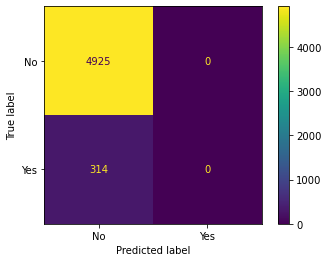

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      1.00      0.97      4925
         Yes       0.00      0.00      0.00       314

    accuracy                           0.94      5239
   macro avg       0.47      0.50      0.48      5239
weighted avg       0.88      0.94      0.91      5239

matthews_corrcoef:  0.0
| KNN Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  Normalizer , KNN N 2
The accuracy of the model on test set is: 0.78 
The Kappa of your model is: 0.01
[[4017  908]
 [ 251   63]]


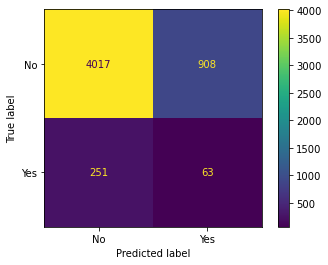

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.82      0.87      4925
         Yes       0.06      0.20      0.10       314

    accuracy                           0.78      5239
   macro avg       0.50      0.51      0.49      5239
weighted avg       0.89      0.78      0.83      5239

matthews_corrcoef:  0.009939685789540065
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  Normalizer
The accuracy of the model on test set is: 0.93 
The Kappa of your model is: 0.01
[[4845   80]
 [ 307    7]]


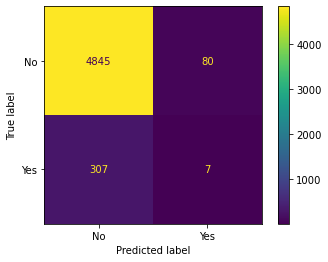

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.98      0.96      4925
         Yes       0.08      0.02      0.03       314

    accuracy                           0.93      5239
   macro avg       0.51      0.50      0.50      5239
weighted avg       0.89      0.93      0.91      5239

matthews_corrcoef:  0.011236428610694994
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  Normalizer
The accuracy of the model on test set is: 0.87 
The Kappa of your model is: 0.09
[[4499  426]
 [ 251   63]]


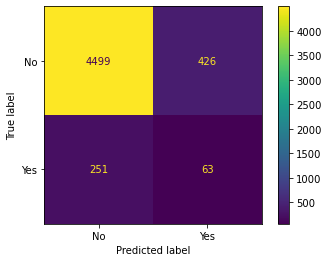

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.91      0.93      4925
         Yes       0.13      0.20      0.16       314

    accuracy                           0.87      5239
   macro avg       0.54      0.56      0.54      5239
weighted avg       0.90      0.87      0.88      5239

matthews_corrcoef:  0.09313278703138507
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  Normalizer
The accuracy of the model on test set is: 0.63 
The Kappa of your model is: 0.02
[[3166 1759]
 [ 178  136]]


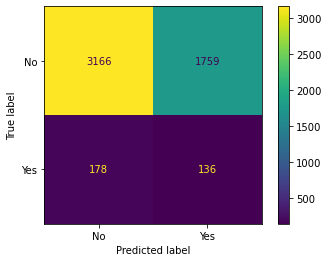

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.64      0.77      4925
         Yes       0.07      0.43      0.12       314

    accuracy                           0.63      5239
   macro avg       0.51      0.54      0.44      5239
weighted avg       0.89      0.63      0.73      5239

matthews_corrcoef:  0.03752632830832335


In [69]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(X,y,"tomek applied","smote sample","Normalizer",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , over sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.91 
The Kappa of your model is: 0.16
<function cohen_kappa_score at 0x000002233DDCCDC0>
[[4723  202]
 [ 254   60]]


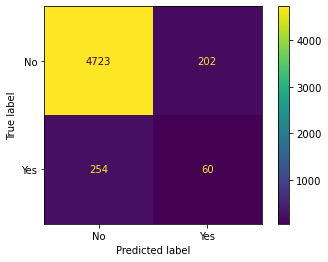

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.96      0.95      4925
         Yes       0.23      0.19      0.21       314

    accuracy                           0.91      5239
   macro avg       0.59      0.58      0.58      5239
weighted avg       0.91      0.91      0.91      5239

matthews_corrcoef:  0.1634256938624044
| KNN Model Results
With:: - Sample balancing:  tomek applied , over sample , - Scaler:  StandardScaler , KNN N 2
The accuracy of the model on test set is: 0.88 
The Kappa of your model is: 0.06
[[4574  351]
 [ 272   42]]


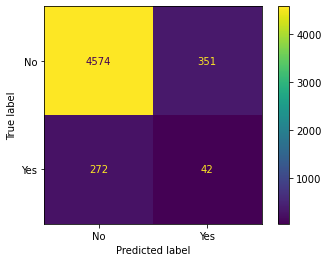

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.93      0.94      4925
         Yes       0.11      0.13      0.12       314

    accuracy                           0.88      5239
   macro avg       0.53      0.53      0.53      5239
weighted avg       0.89      0.88      0.89      5239

matthews_corrcoef:  0.05630967536922846
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , over sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.93 
The Kappa of your model is: 0.03
[[4884   41]
 [ 306    8]]


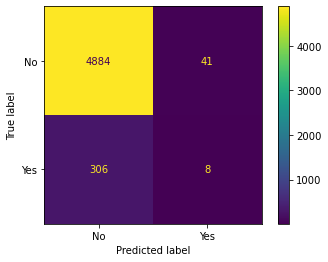

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.99      0.97      4925
         Yes       0.16      0.03      0.04       314

    accuracy                           0.93      5239
   macro avg       0.55      0.51      0.50      5239
weighted avg       0.89      0.93      0.91      5239

matthews_corrcoef:  0.04229822128397753
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , over sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.67 
The Kappa of your model is: 0.11
[[3276 1649]
 [  97  217]]


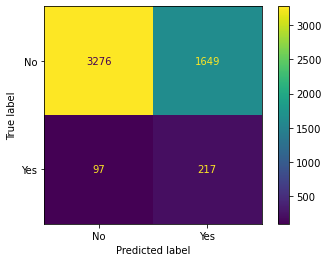

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.97      0.67      0.79      4925
         Yes       0.12      0.69      0.20       314

    accuracy                           0.67      5239
   macro avg       0.54      0.68      0.49      5239
weighted avg       0.92      0.67      0.75      5239

matthews_corrcoef:  0.17659222747932377
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , over sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.72 
The Kappa of your model is: 0.10
[[3571 1354]
 [ 137  177]]


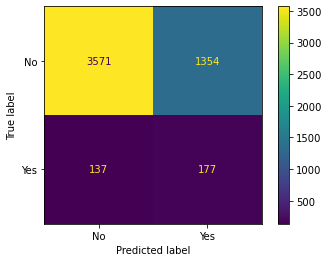

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.96      0.73      0.83      4925
         Yes       0.12      0.56      0.19       314

    accuracy                           0.72      5239
   macro avg       0.54      0.64      0.51      5239
weighted avg       0.91      0.72      0.79      5239

matthews_corrcoef:  0.1507173232152959


In [70]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(X,y,"tomek applied","over sample","StandardScaler",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.94 
The Kappa of your model is: 0.00
<function cohen_kappa_score at 0x000002233DDCCDC0>
[[4925    0]
 [ 314    0]]


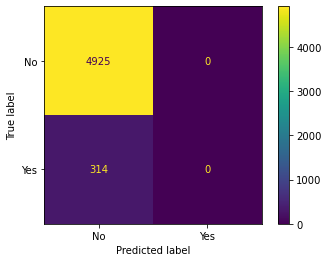

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      1.00      0.97      4925
         Yes       0.00      0.00      0.00       314

    accuracy                           0.94      5239
   macro avg       0.47      0.50      0.48      5239
weighted avg       0.88      0.94      0.91      5239

matthews_corrcoef:  0.0
| KNN Model Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  MinMax , KNN N 2
The accuracy of the model on test set is: 0.76 
The Kappa of your model is: 0.07
[[3882 1043]
 [ 195  119]]


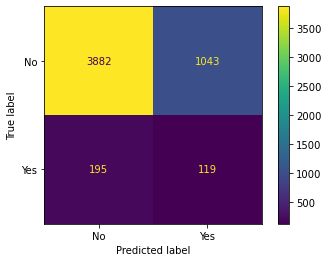

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.79      0.86      4925
         Yes       0.10      0.38      0.16       314

    accuracy                           0.76      5239
   macro avg       0.53      0.58      0.51      5239
weighted avg       0.90      0.76      0.82      5239

matthews_corrcoef:  0.09553044768746632
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.64 
The Kappa of your model is: 0.10
[[3114 1811]
 [  87  227]]


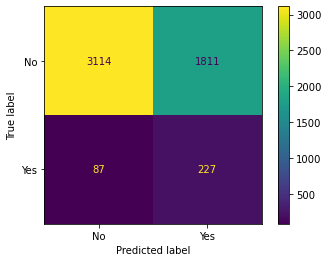

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.97      0.63      0.77      4925
         Yes       0.11      0.72      0.19       314

    accuracy                           0.64      5239
   macro avg       0.54      0.68      0.48      5239
weighted avg       0.92      0.64      0.73      5239

matthews_corrcoef:  0.17294711972170024
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.66 
The Kappa of your model is: 0.10
[[3248 1677]
 [  98  216]]


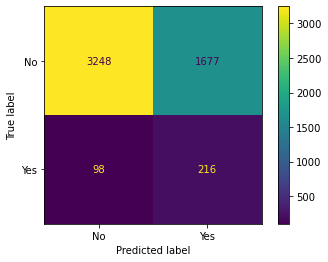

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.97      0.66      0.79      4925
         Yes       0.11      0.69      0.20       314

    accuracy                           0.66      5239
   macro avg       0.54      0.67      0.49      5239
weighted avg       0.92      0.66      0.75      5239

matthews_corrcoef:  0.17165148801042054
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.64 
The Kappa of your model is: 0.11
[[3110 1815]
 [  78  236]]


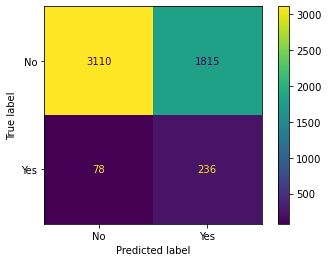

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.98      0.63      0.77      4925
         Yes       0.12      0.75      0.20       314

    accuracy                           0.64      5239
   macro avg       0.55      0.69      0.48      5239
weighted avg       0.92      0.64      0.73      5239

matthews_corrcoef:  0.1862935379935145


In [72]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(X,y,"tomek applied","under sample","MinMax",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.91 
The Kappa of your model is: 0.15
<function cohen_kappa_score at 0x000002233DDCCDC0>
[[4689  236]
 [ 252   62]]


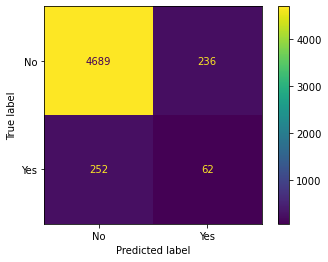

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.95      0.95      4925
         Yes       0.21      0.20      0.20       314

    accuracy                           0.91      5239
   macro avg       0.58      0.57      0.58      5239
weighted avg       0.90      0.91      0.91      5239

matthews_corrcoef:  0.15324655799167086
| KNN Model Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  power , KNN N 2
The accuracy of the model on test set is: 0.87 
The Kappa of your model is: 0.04
[[4537  388]
 [ 274   40]]


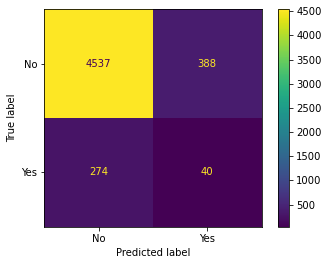

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.92      0.93      4925
         Yes       0.09      0.13      0.11       314

    accuracy                           0.87      5239
   macro avg       0.52      0.52      0.52      5239
weighted avg       0.89      0.87      0.88      5239

matthews_corrcoef:  0.04212360102545881
| Random Forest Classifier Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.92 
The Kappa of your model is: 0.06
[[4804  121]
 [ 293   21]]


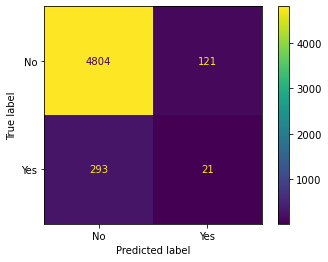

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.98      0.96      4925
         Yes       0.15      0.07      0.09       314

    accuracy                           0.92      5239
   macro avg       0.55      0.52      0.53      5239
weighted avg       0.89      0.92      0.91      5239

matthews_corrcoef:  0.06184635761675944
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.86 
The Kappa of your model is: 0.16
[[4392  533]
 [ 203  111]]


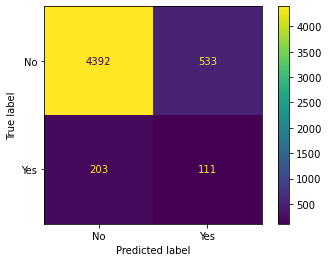

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.96      0.89      0.92      4925
         Yes       0.17      0.35      0.23       314

    accuracy                           0.86      5239
   macro avg       0.56      0.62      0.58      5239
weighted avg       0.91      0.86      0.88      5239

matthews_corrcoef:  0.17731443572411512
| Support Vector Machines Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.78 
The Kappa of your model is: 0.11
[[3939  986]
 [ 176  138]]


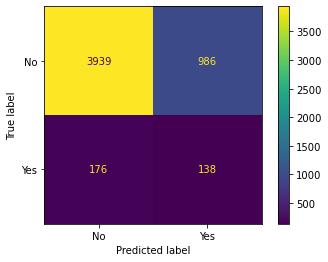

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.96      0.80      0.87      4925
         Yes       0.12      0.44      0.19       314

    accuracy                           0.78      5239
   macro avg       0.54      0.62      0.53      5239
weighted avg       0.91      0.78      0.83      5239

matthews_corrcoef:  0.13836291314382942


In [71]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(X,y,"tomek not applied","smote sample","power",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek not applied , under sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.94 
The Kappa of your model is: 0.00
<function cohen_kappa_score at 0x000002233DDCCDC0>
[[4922    3]
 [ 313    1]]


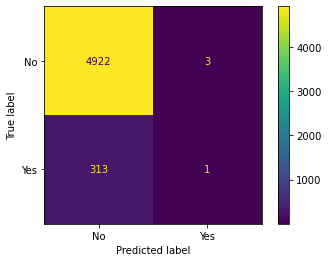

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      1.00      0.97      4925
         Yes       0.25      0.00      0.01       314

    accuracy                           0.94      5239
   macro avg       0.60      0.50      0.49      5239
weighted avg       0.90      0.94      0.91      5239

matthews_corrcoef:  0.0221337003597208
| KNN Model Results
With:: - Sample balancing:  tomek not applied , under sample , - Scaler:  MinMax , KNN N 2
The accuracy of the model on test set is: 0.77 
The Kappa of your model is: 0.08
[[3888 1037]
 [ 191  123]]


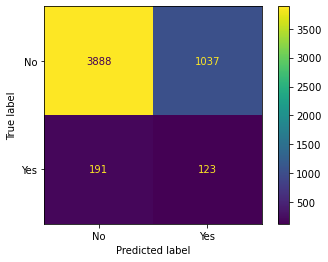

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.79      0.86      4925
         Yes       0.11      0.39      0.17       314

    accuracy                           0.77      5239
   macro avg       0.53      0.59      0.52      5239
weighted avg       0.90      0.77      0.82      5239

matthews_corrcoef:  0.10356850075335651
| Random Forest Classifier Results
With:: - Sample balancing:  tomek not applied , under sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.63 
The Kappa of your model is: 0.10
[[3090 1835]
 [  85  229]]


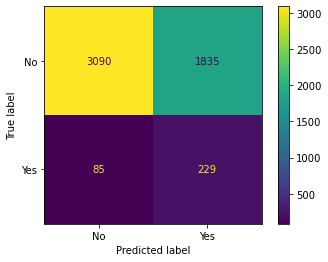

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.97      0.63      0.76      4925
         Yes       0.11      0.73      0.19       314

    accuracy                           0.63      5239
   macro avg       0.54      0.68      0.48      5239
weighted avg       0.92      0.63      0.73      5239

matthews_corrcoef:  0.17328347978724895
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek not applied , under sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.65 
The Kappa of your model is: 0.10
[[3201 1724]
 [  95  219]]


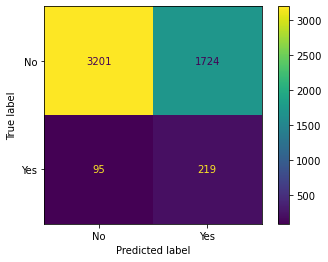

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.97      0.65      0.78      4925
         Yes       0.11      0.70      0.19       314

    accuracy                           0.65      5239
   macro avg       0.54      0.67      0.49      5239
weighted avg       0.92      0.65      0.74      5239

matthews_corrcoef:  0.17071417703197214
| Support Vector Machines Results
With:: - Sample balancing:  tomek not applied , under sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.63 
The Kappa of your model is: 0.10
[[3050 1875]
 [  76  238]]


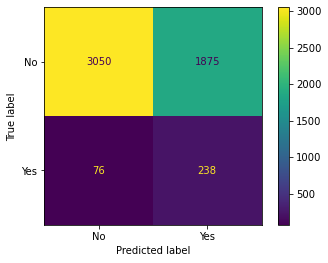

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.98      0.62      0.76      4925
         Yes       0.11      0.76      0.20       314

    accuracy                           0.63      5239
   macro avg       0.54      0.69      0.48      5239
weighted avg       0.92      0.63      0.72      5239

matthews_corrcoef:  0.1825384035583608


In [73]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(X,y,"tomek not applied","under sample","MinMax",2)

## Future Recomendations:

- Visual review our data previous
- Automate data collection pd(concat) 
- Model Performance Exploration: Grid Search
- Overview of results

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.91 
The Kappa of your model is: 0.17
<function cohen_kappa_score at 0x000002233DDCCDC0>
[[4705  220]
 [ 249   65]]


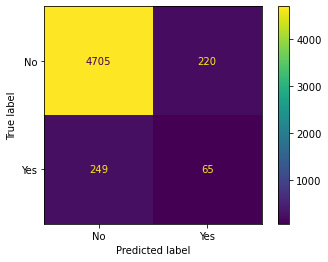

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.96      0.95      4925
         Yes       0.23      0.21      0.22       314

    accuracy                           0.91      5239
   macro avg       0.59      0.58      0.58      5239
weighted avg       0.91      0.91      0.91      5239

matthews_corrcoef:  0.16989601934081466
| KNN Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  MinMax , KNN N 2
The accuracy of the model on test set is: 0.86 
The Kappa of your model is: 0.07
[[4466  459]
 [ 256   58]]


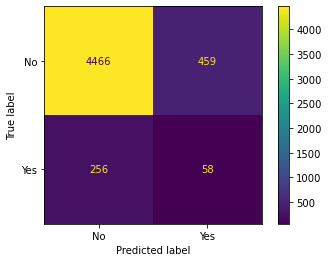

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.91      0.93      4925
         Yes       0.11      0.18      0.14       314

    accuracy                           0.86      5239
   macro avg       0.53      0.55      0.53      5239
weighted avg       0.90      0.86      0.88      5239

matthews_corrcoef:  0.07283730870488576
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.92 
The Kappa of your model is: 0.06
[[4804  121]
 [ 292   22]]


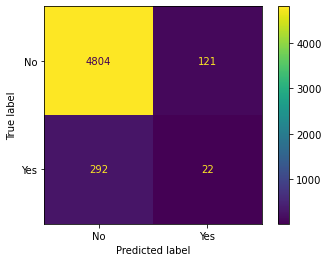

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.98      0.96      4925
         Yes       0.15      0.07      0.10       314

    accuracy                           0.92      5239
   macro avg       0.55      0.52      0.53      5239
weighted avg       0.90      0.92      0.91      5239

matthews_corrcoef:  0.06627511200789918
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.86 
The Kappa of your model is: 0.15
[[4409  516]
 [ 212  102]]


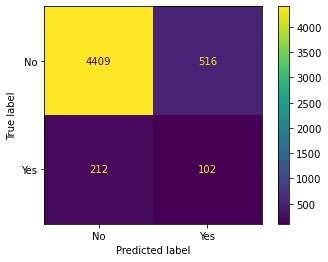

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.90      0.92      4925
         Yes       0.17      0.32      0.22       314

    accuracy                           0.86      5239
   macro avg       0.56      0.61      0.57      5239
weighted avg       0.91      0.86      0.88      5239

matthews_corrcoef:  0.1619440387606135
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.72 
The Kappa of your model is: 0.10
[[3593 1332]
 [ 139  175]]


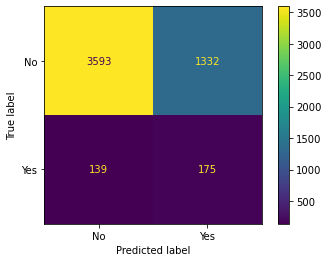

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.96      0.73      0.83      4925
         Yes       0.12      0.56      0.19       314

    accuracy                           0.72      5239
   macro avg       0.54      0.64      0.51      5239
weighted avg       0.91      0.72      0.79      5239

matthews_corrcoef:  0.15042588842357502


In [74]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(X,y,"tomek applied","smote sample","MinMax",2)